# Problem 2 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create three toy datasets
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 3,
                    shuffle=True, 
                    random_state=40)

In [3]:
print("Features:\n", X1[:5])
print("Target:\n", y1[:5])

Features:
 [[-2.94305724 -4.56159935]
 [-1.30337776 -8.9771589 ]
 [-0.13511804 -3.15334516]
 [ 2.88970296 -4.26961959]
 [ 4.18260704 -5.1819068 ]]
Target:
 [2 0 2 1 1]


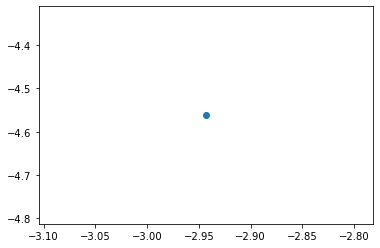

In [4]:
plt.scatter(*X1[0].T)

In [5]:
X2, y2 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 5,
                    shuffle=True, 
                    random_state=40)

In [7]:
print("Features:\n", X2[:5])
print("Target:\n", y2[:5])

Features:
 [[-1.91709047 -6.35880703]
 [-0.33226927  1.41718777]
 [-1.7694279  -9.32767997]
 [ 7.4584847  -5.30050985]
 [ 4.23289146  3.55800723]]
Target:
 [2 3 0 1 4]


In [10]:
X3, y3 = make_blobs(n_samples= 100,
                    n_features= 2,
                    centers= 4,
                    shuffle=True, 
                    random_state=40)

In [9]:

print("Features:\n", X3[:5])
print("Target:\n", y3[:5])

Features:
 [[-1.406291   -3.69019344]
 [ 6.30257159 -5.27091977]
 [ 0.27105523  1.08135882]
 [-1.81453265 -7.62003933]
 [-1.59195501  4.38440315]]
Target:
 [2 1 3 0 3]


(-4.303177597856472,
 9.85154288097889,
 -11.371188444994932,
 -1.5679953095760877)

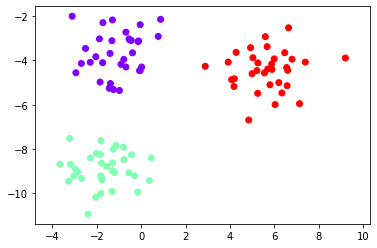

In [11]:
# Apply GMM algorithm 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 3)
gmm.fit(X1)

gmm_labels = gmm.predict(X1)
plt.scatter(X1[:,0], X1[:,1], c= gmm_labels, cmap='rainbow')
plt.axis('equal')

(-3.8332819989055826,
 8.546145693863929,
 -11.691088352538854,
 5.149902748846257)

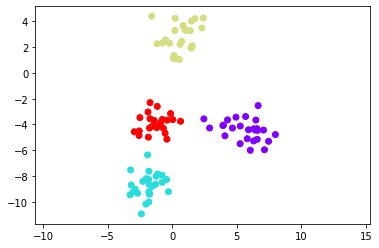

In [12]:
gmm = GaussianMixture(n_components= 4)
gmm.fit(X3)

gmm_labels = gmm.predict(X3)
plt.scatter(X3[:,0], X3[:,1], c= gmm_labels, cmap='rainbow')
plt.axis('equal')

In [13]:
from matplotlib.patches import Ellipse

In [15]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)  

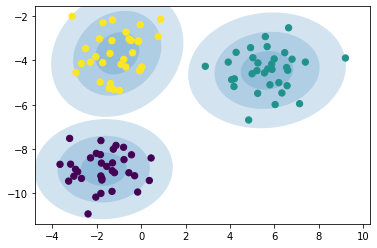

In [16]:
gmm = GaussianMixture(n_components=3, random_state=42)
plot_gmm(gmm, X1)

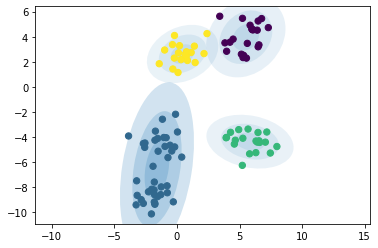

In [17]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X2)

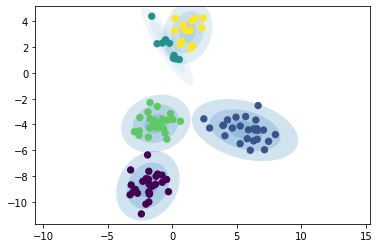

In [18]:
gmm = GaussianMixture(n_components= 5, random_state= 42)
plot_gmm(gmm, X3)

C:\Users\pvhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


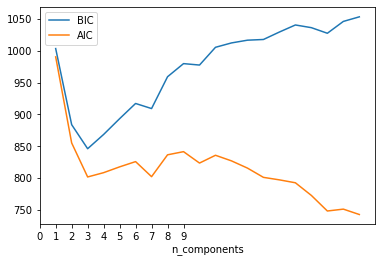

In [19]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X1)
          for n in n_components]

plt.plot(n_components, [m.bic(X1) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X1) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(np.arange(0, 10, step= 1))
plt.show()

C:\Users\pvhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


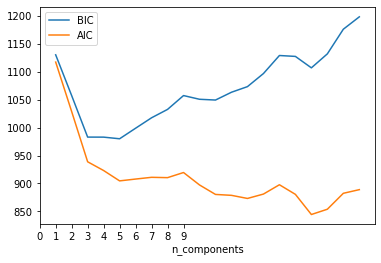

In [20]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X2)
          for n in n_components]

plt.plot(n_components, [m.bic(X2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(np.arange(0, 10, step= 1))
plt.show()

C:\Users\pvhon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


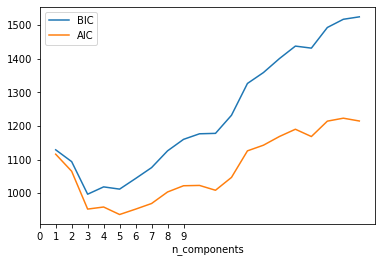

In [21]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X2)
          for n in n_components]

plt.plot(n_components, [m.bic(X3) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X3) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(np.arange(0, 10, step= 1))
plt.show()

In [22]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [23]:
from sklearn import metrics 

Text(0, 0.5, 'Score')

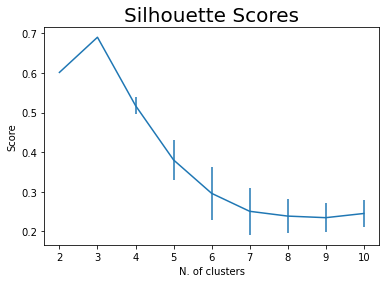

In [24]:
n_clusters= np.arange(2, 11)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X1) 
        labels=gmm.predict(X1)
        sil= metrics.silhouette_score(X1, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)
    
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [25]:
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

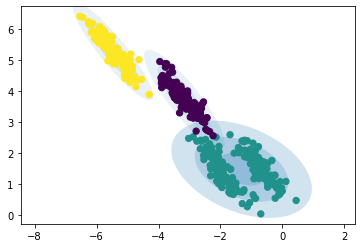

In [26]:
gmm = GaussianMixture(n_components = 3, covariance_type='full', random_state = 42) 
plot_gmm(gmm, X_stretched)